In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/4Feb')

Mounted at /content/drive


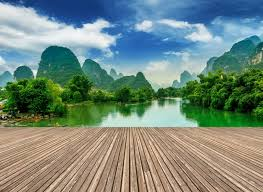

In [ ]:
image = cv2.imread('/content/drive/MyDrive/4Feb/1.jpeg')
from google.colab.patches import cv2_imshow
cv2_imshow(image)

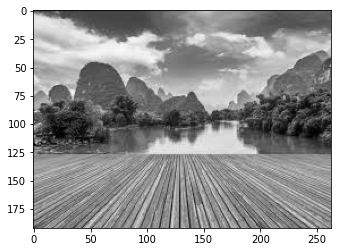

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(192, 263)

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1]) #Converting 2D array into single dimension
print(gray_r)
gray_r.shape

[0.28246824 0.39227216 0.43008902 ... 0.37167294 0.50108471 0.60696706]


(50496,)

In [ ]:
#Mean of the pixel values and use that as a threshold.
#If the pixel value is more than our threshold, we can say that it belongs to an object.
#If the pixel value is less than the threshold, it will be treated as the background.
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0

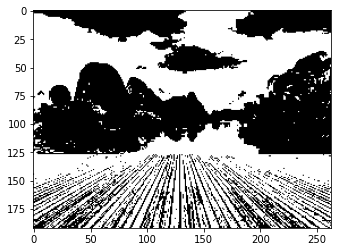

In [ ]:
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

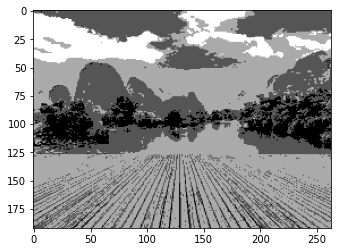

In [ ]:
#Multiple thresholds to detect multiple objects
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

(192, 263, 3)


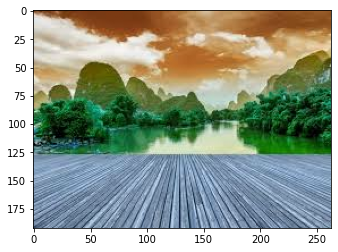

In [ ]:
#K-means based image segmentation
pic = cv2.imread('/content/drive/MyDrive/4Feb/1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
#For clustering the image using k-means,
#we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [ ]:
#Fit the k-means algorithm on this reshaped array and obtain the clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
pic2show

array([[0.52287582, 0.37730791, 0.15883273],
       [0.52287582, 0.37730791, 0.15883273],
       [0.52287582, 0.37730791, 0.15883273],
       ...,
       [0.46699949, 0.57144752, 0.65940943],
       [0.46699949, 0.57144752, 0.65940943],
       [0.46699949, 0.57144752, 0.65940943]])

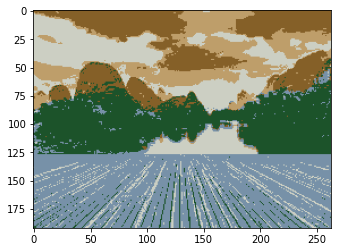

In [ ]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)